In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv(r"C:\Users\Shrut\Downloads\archive (4)\globalterrorismdb_0718dist.csv", encoding='latin-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [5]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [6]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
data.shape

(181691, 18)

In [8]:
data.info

<bound method DataFrame.info of         Year  Month  day             Country            State  \
0       1970      7    2  Dominican Republic              NaN   
1       1970      0    0              Mexico          Federal   
2       1970      1    0         Philippines           Tarlac   
3       1970      1    0              Greece           Attica   
4       1970      1    0               Japan          Fukouka   
...      ...    ...  ...                 ...              ...   
181686  2017     12   31             Somalia  Middle Shebelle   
181687  2017     12   31               Syria         Lattakia   
181688  2017     12   31         Philippines      Maguindanao   
181689  2017     12   31               India          Manipur   
181690  2017     12   31         Philippines      Maguindanao   

                             Region           City   latitude   longitude  \
0       Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                     North Ameri

In [9]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [39]:
data.dropna()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
11,1970,1,6,United States,Colorado,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War
14,1970,1,9,United States,Puerto Rico,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,12,30,India,Kerala,South Asia,Koothuparamba,11.831902,75.565432,Bombing/Explosion,0.0,0.0,Koothuparamba Police Station,12/30/2017: Assailants threw an explosive devi...,Unknown,Police,Explosives,"The specific motive is unknown; however, sourc..."
181665,2017,12,30,India,Chhattisgarh,South Asia,Toylanka,18.802725,81.497666,Facility/Infrastructure Attack,0.0,0.0,Road Construction Site,12/30/2017: Assailants set fire to seven vehic...,Communist Party of India - Maoist (CPI-Maoist),Business,Firearms,"The specific motive is unknown; however, sourc..."
181672,2017,12,31,India,Jammu and Kashmir,South Asia,Lethapora,33.966527,74.964225,Armed Assault,8.0,3.0,Camp,12/31/2017: Assailants armed with grenades and...,Jaish-e-Mohammad (JeM),Police,Explosives,"The specific motive is unknown; however, sourc..."
181682,2017,12,31,Italy,Marche,Western Europe,Spinetoli,42.888982,13.772795,Facility/Infrastructure Attack,0.0,0.0,Migrant Center,12/31/2017: Assailants set fire to a migrants'...,Unknown,Private Citizens & Property,Incendiary,"The specific motive is unknown; however, sourc..."


In [40]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [41]:
data.head

<bound method NDFrame.head of         Year  Month  day             Country            State  \
0       1970      7    2  Dominican Republic              NaN   
1       1970      0    0              Mexico          Federal   
2       1970      1    0         Philippines           Tarlac   
3       1970      1    0              Greece           Attica   
4       1970      1    0               Japan          Fukouka   
...      ...    ...  ...                 ...              ...   
181686  2017     12   31             Somalia  Middle Shebelle   
181687  2017     12   31               Syria         Lattakia   
181688  2017     12   31         Philippines      Maguindanao   
181689  2017     12   31               India          Manipur   
181690  2017     12   31         Philippines      Maguindanao   

                             Region           City   latitude   longitude  \
0       Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                     North America

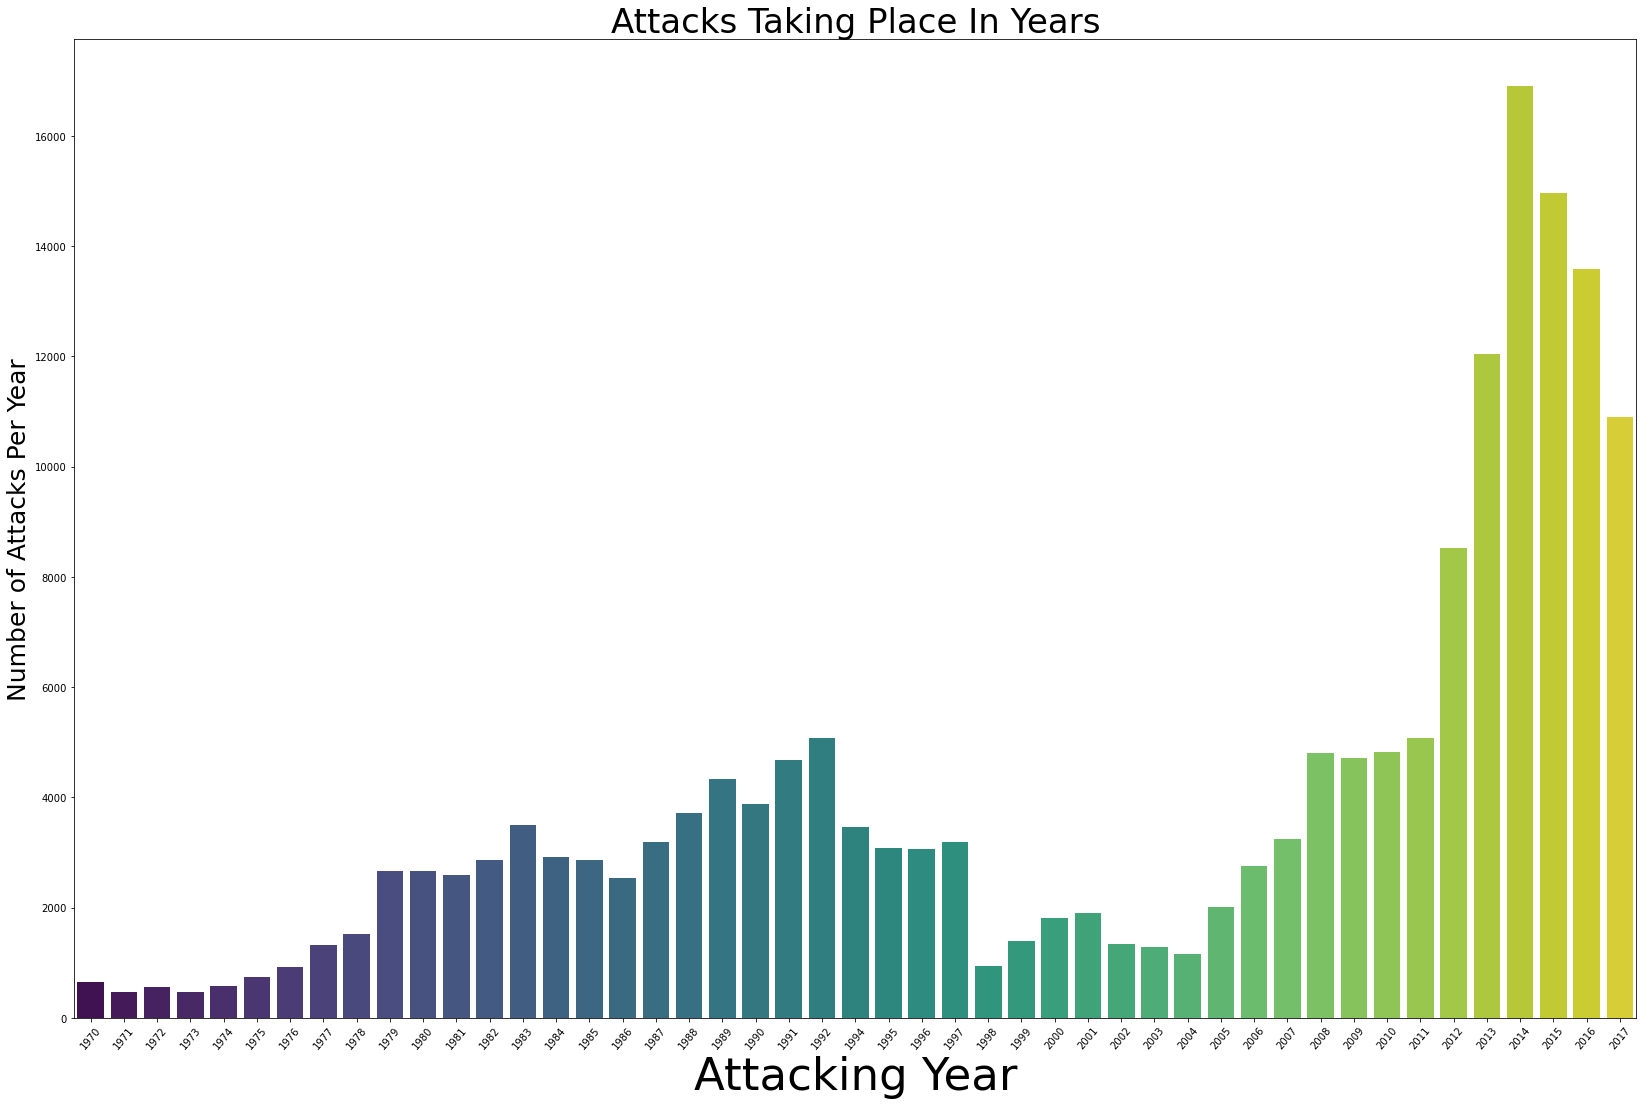

In [42]:
year=data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (28,18))
sns.barplot(x = year,y = years_count,palette = "viridis")
plt.xticks(rotation = 50)
plt.title('Attacks Taking Place In Years',fontsize=34)
plt.xlabel('Attacking Year',fontsize=45)
plt.ylabel('Number of Attacks Per Year',fontsize=25)

plt.show()

<AxesSubplot:>

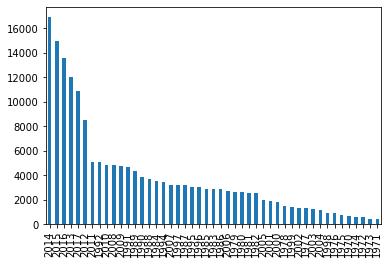

In [43]:
data['Year'].value_counts().plot(kind='bar')

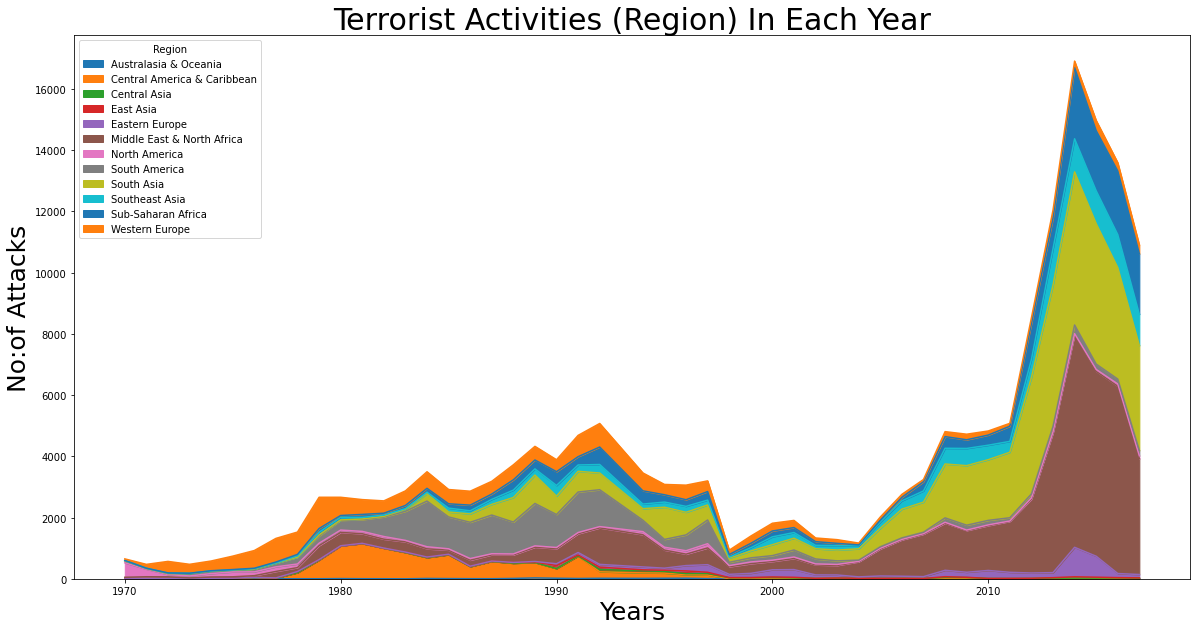

In [44]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=True,figsize=(20,10))
plt.ylabel('No:of Attacks',fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.title('Terrorist Activities (Region) In Each Year',fontsize=30)
plt.show()

In [45]:
attack = data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

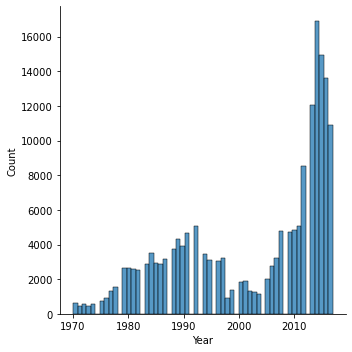

In [46]:
sns.displot(data=data, x="Year", kind="hist",multiple="stack")

<AxesSubplot:>

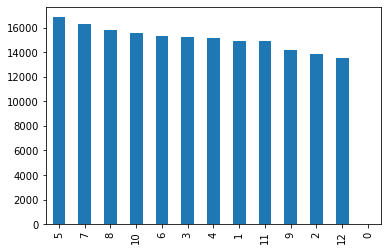

In [47]:
data['Month'].value_counts().plot(kind='bar')

In [48]:
data.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

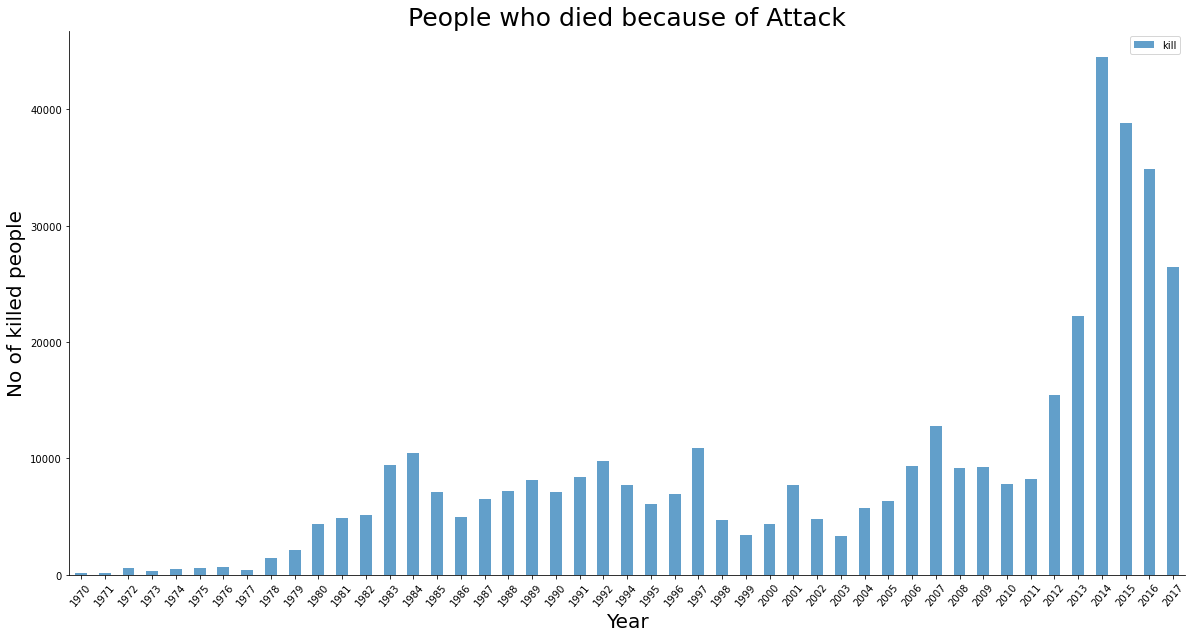

In [49]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People who died because of Attack",fontsize=25)
plt.ylabel("No of killed people",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

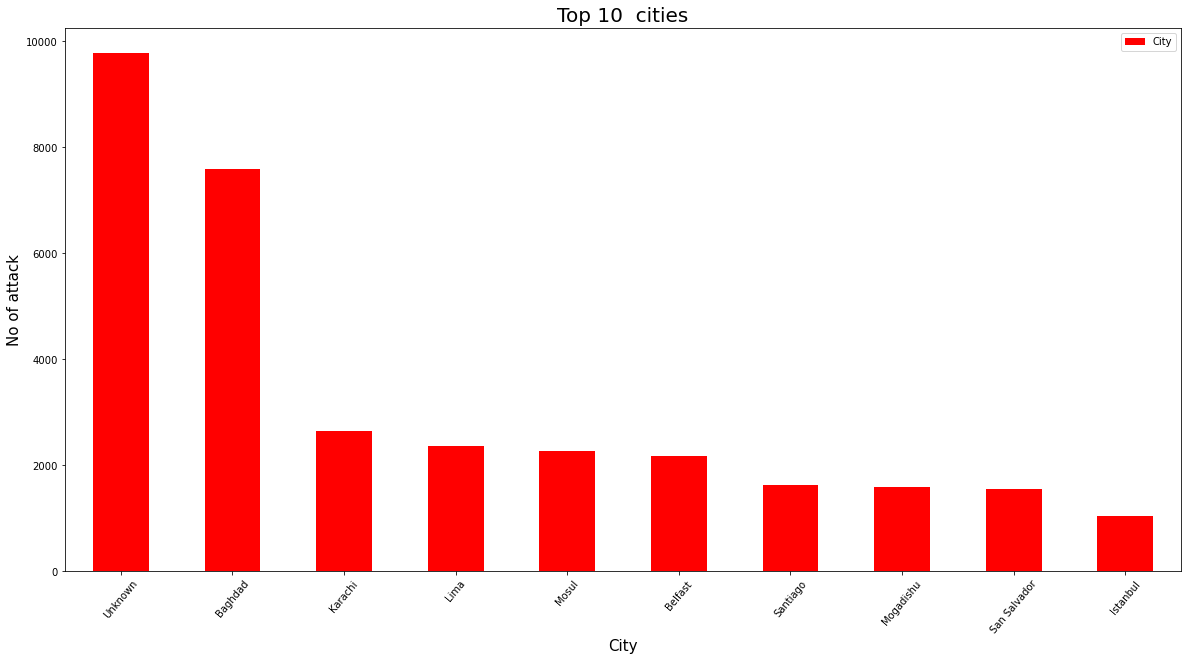

In [50]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("No of attack",fontsize=15)
plt.title("Top 10  cities",fontsize=20)
plt.show()

<AxesSubplot:>

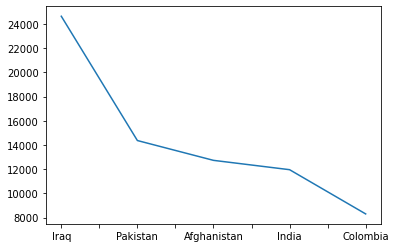

In [51]:
data['Country'].value_counts().head().plot(kind='line') 

In [52]:
data['Country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

<AxesSubplot:>

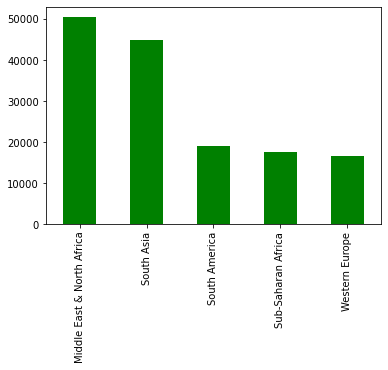

In [53]:
data['Region'].value_counts().head().plot(kind='bar',color='green') 

In [54]:
data['Region'].value_counts().head()

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64

In [55]:
data['Month'].value_counts().head()

5     16875
7     16268
8     15800
10    15563
6     15359
Name: Month, dtype: int64

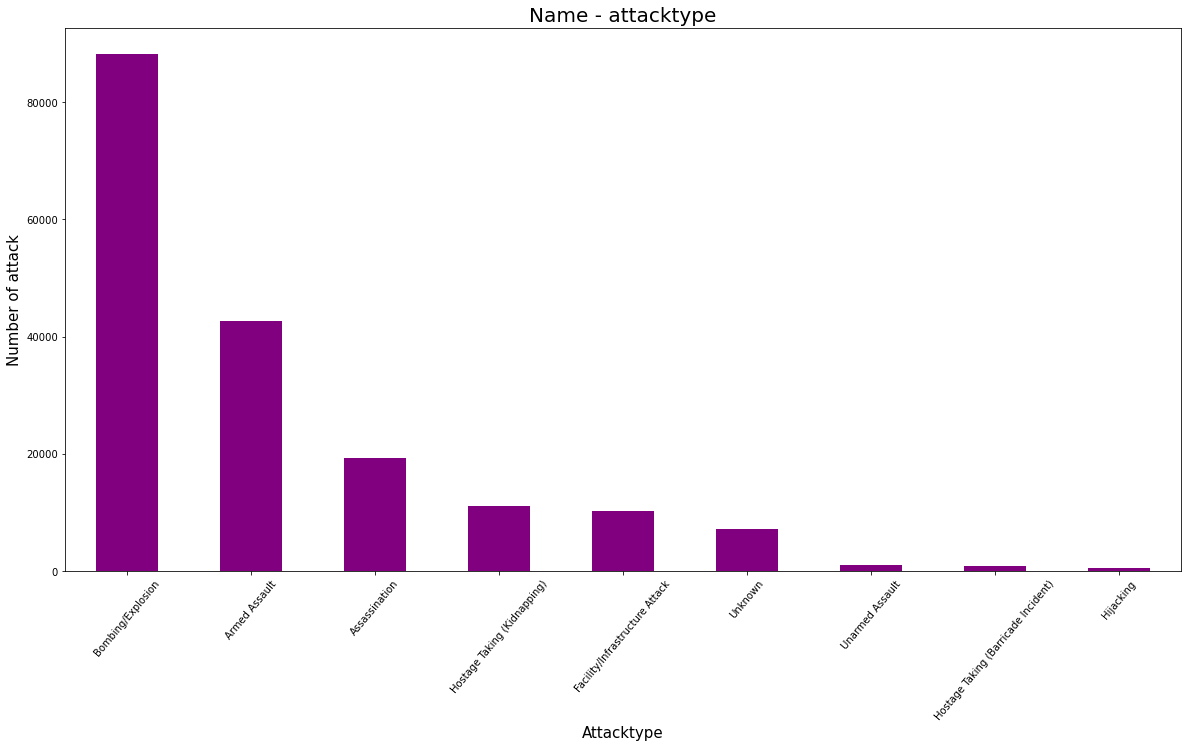

In [56]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='purple')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name - attacktype",fontsize=20)
plt.show()

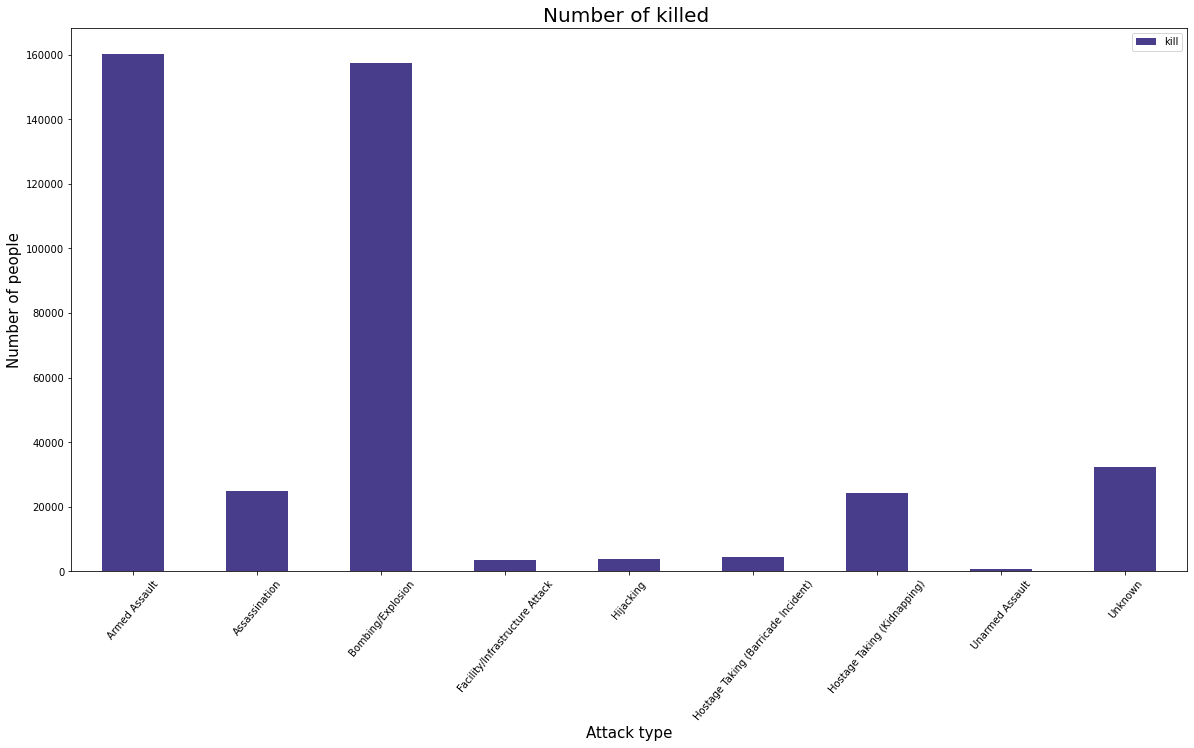

In [57]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])

plt.xlabel('Attack type',fontsize=15)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xticks(rotation=50)
plt.show()

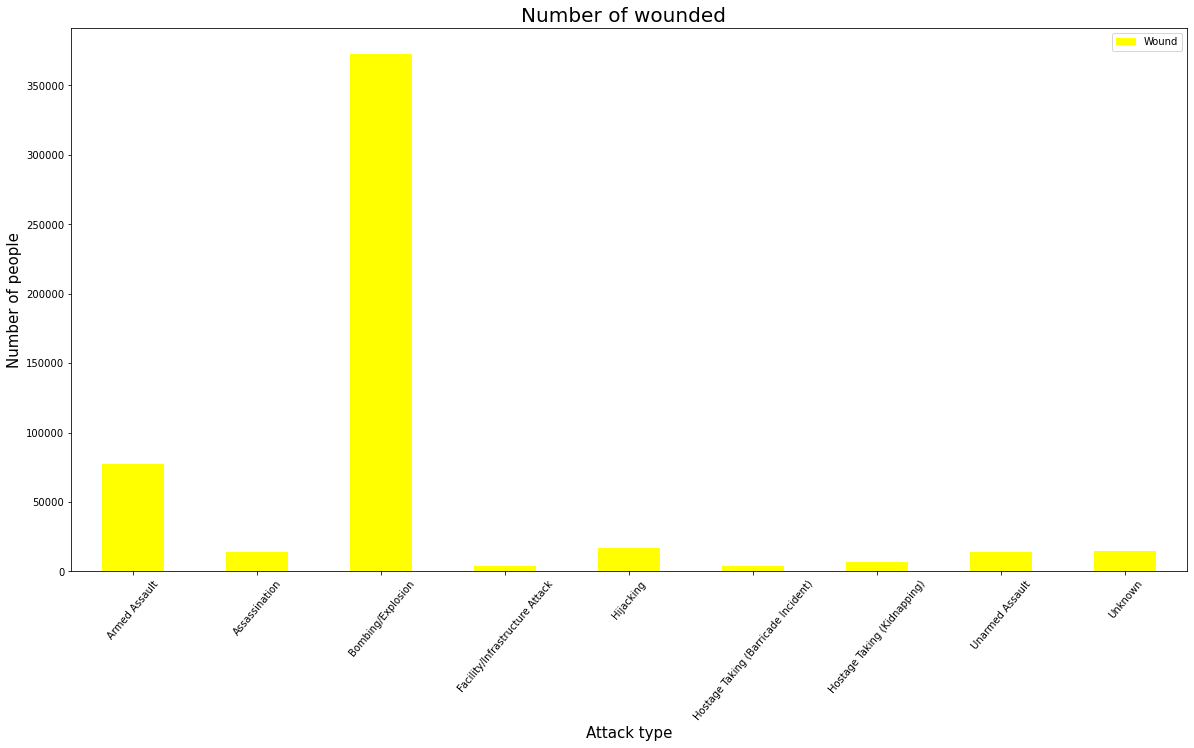

In [58]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['yellow'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

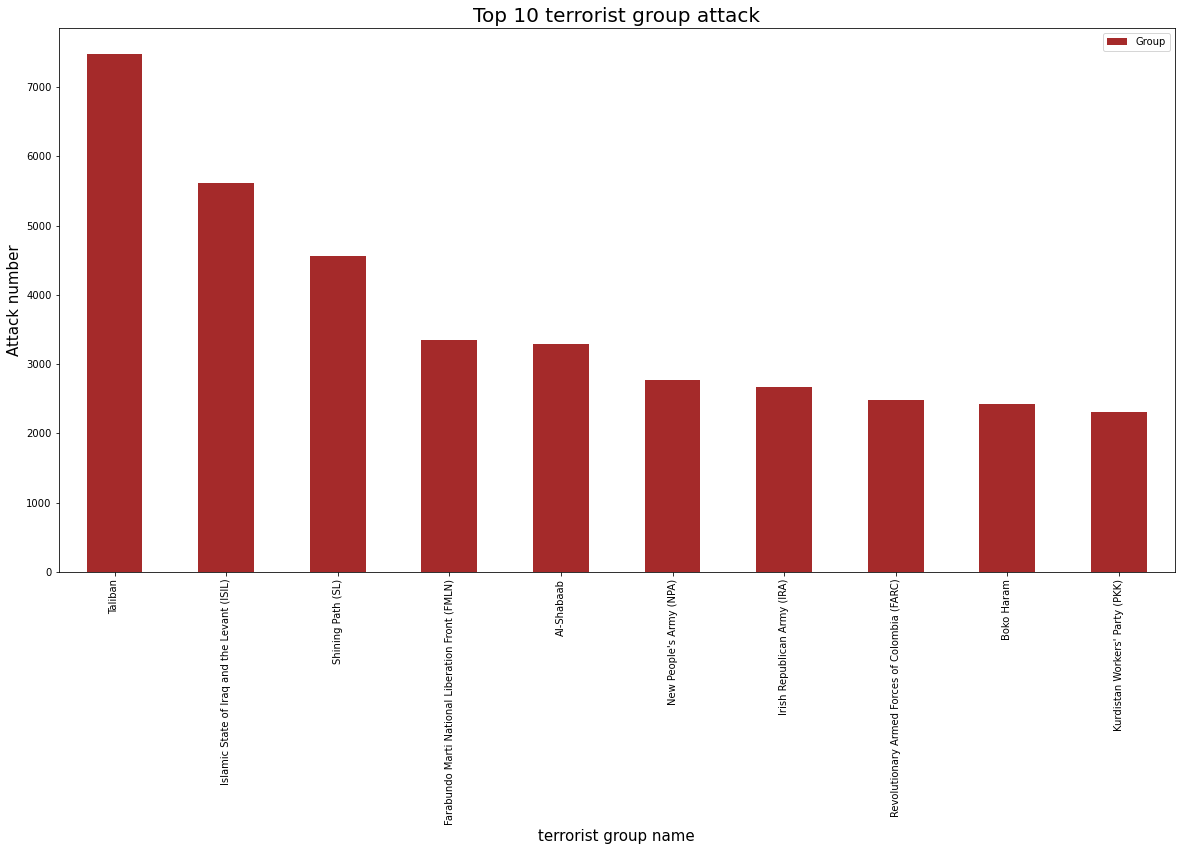

In [59]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='brown',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

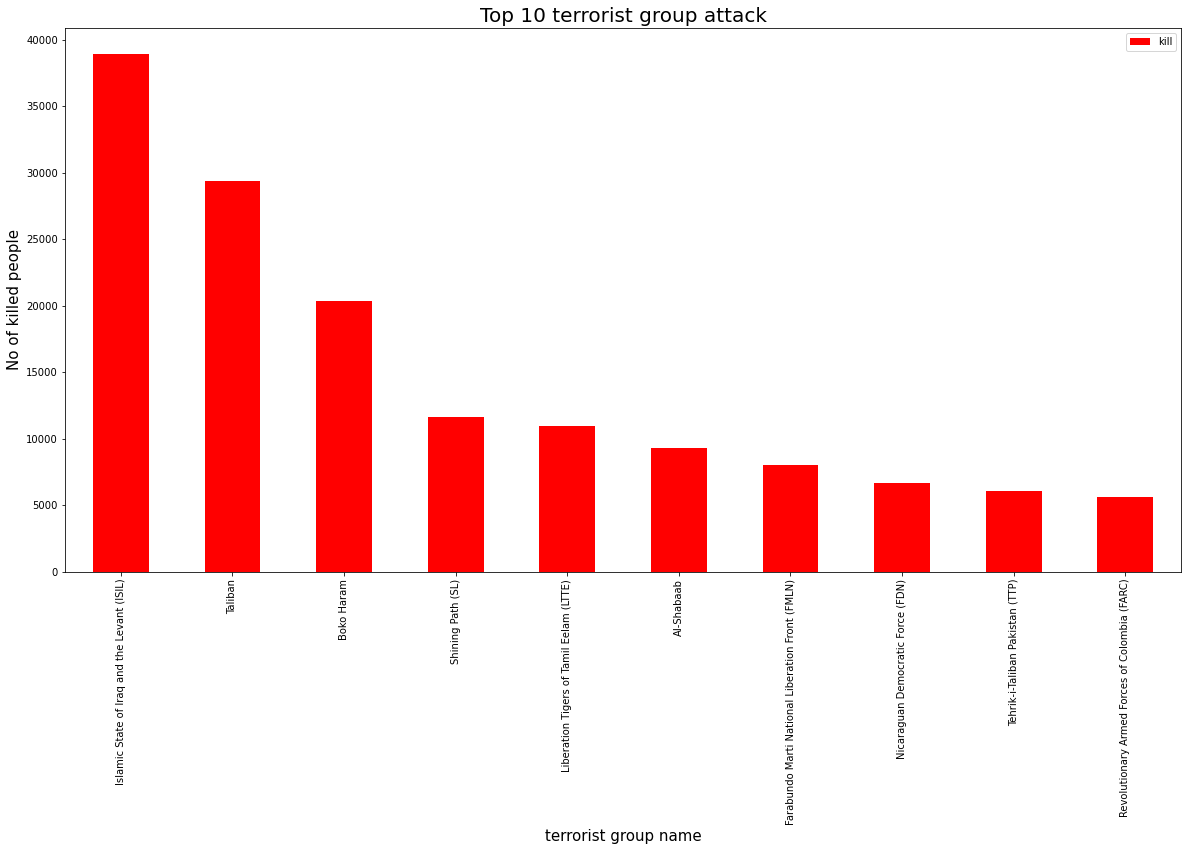

In [60]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [61]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [62]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [63]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [64]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [65]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [66]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [67]:
attacks_by_country_region = data.groupby(['Country', 'Region']).size().reset_index(name='Total_Attacks_Count')

# Find the row with the maximum total number of attacks
max_attacks_row = attacks_by_country_region.loc[attacks_by_country_region['Total_Attacks_Count'].idxmax()]
min_attacks_row = attacks_by_country_region.loc[attacks_by_country_region['Total_Attacks_Count'].idxmin()]

print("Country with the maximum attacks:", max_attacks_row['Country'])
print("Region with the maximum attacks:", max_attacks_row['Region'])
print("Region with the minimum attacks:", min_attacks_row['Region'])
print("Total number of attacks in that region:", max_attacks_row['Total_Attacks_Count'])

Country with the maximum attacks: Iraq
Region with the maximum attacks: Middle East & North Africa
Region with the minimum attacks: Western Europe
Total number of attacks in that region: 24636
